In [30]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
# Cargar el conjunto de datos
file_path = 'online_shoppers_intention.csv'
data = pd.read_csv(file_path)

# Mostrar los primeros registros del DataFrame para verificar la carga exitosa
print(data.head())

# Obtener información sobre el conjunto de datos y los tipos de datos de cada columna
data_info = data.info()
print(data_info)

# Identificar las variables numéricas y categóricas
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

print("Variables numéricas: ", numeric_columns)
print("Variables categóricas: ", categorical_columns)

   Administrative  Administrative_Duration  Informational  \
0             0.0                      0.0            0.0   
1             0.0                      0.0            0.0   
2             0.0                     -1.0            0.0   
3             0.0                      0.0            0.0   
4             0.0                      0.0            0.0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0             1.0                 0.000000   
1                     0.0             2.0                64.000000   
2                    -1.0             1.0                -1.000000   
3                     0.0             2.0                 2.666667   
4                     0.0            10.0               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb   

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


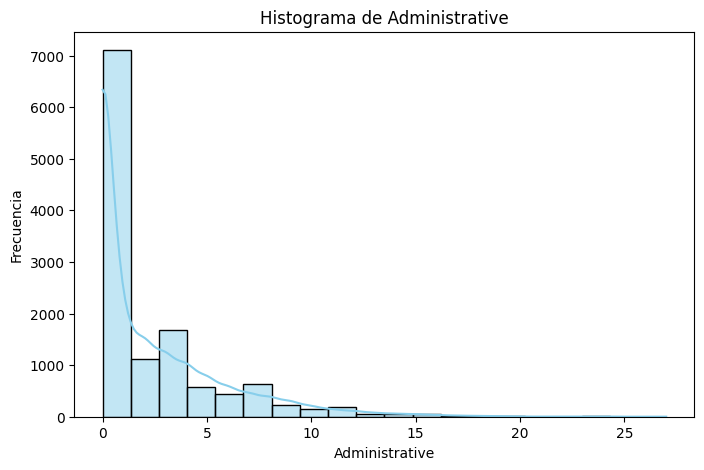

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


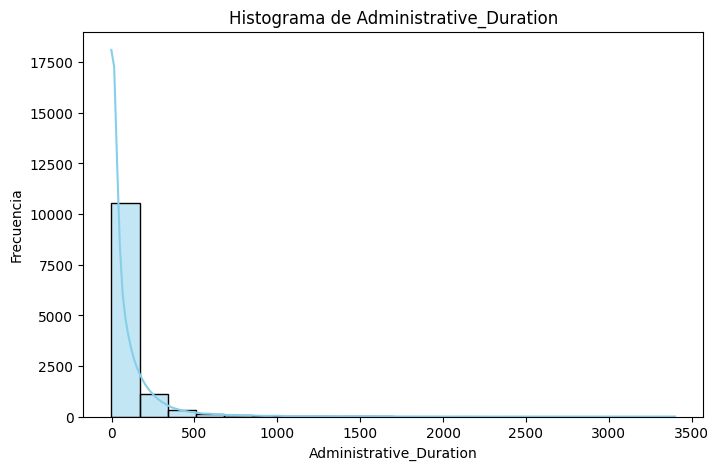

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


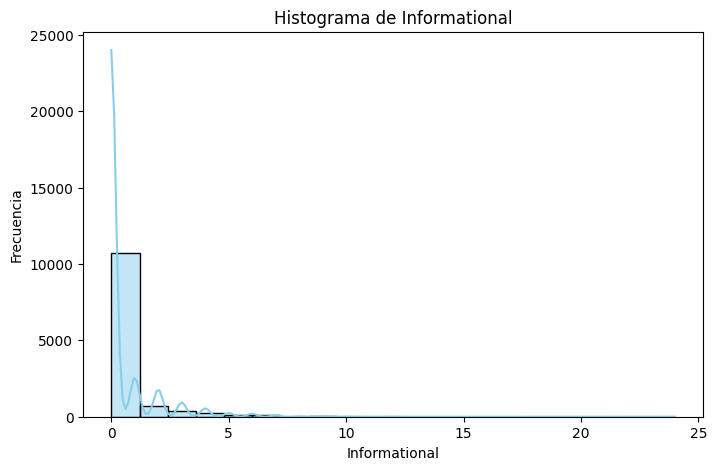

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


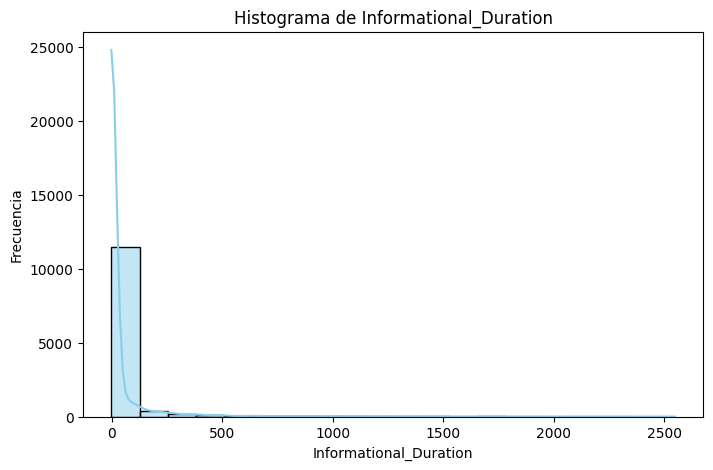

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


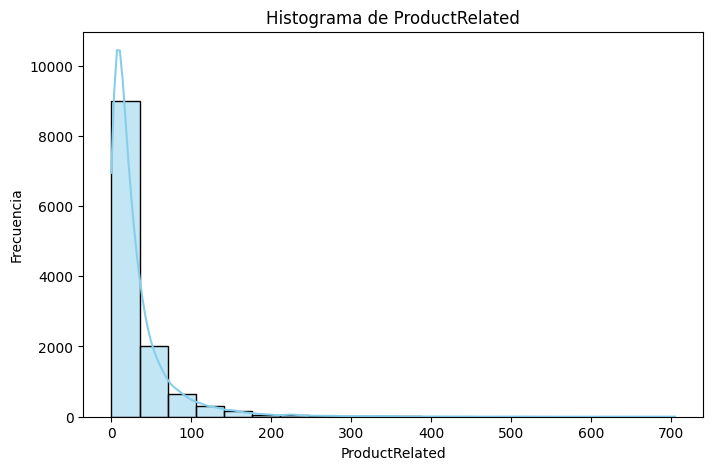

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


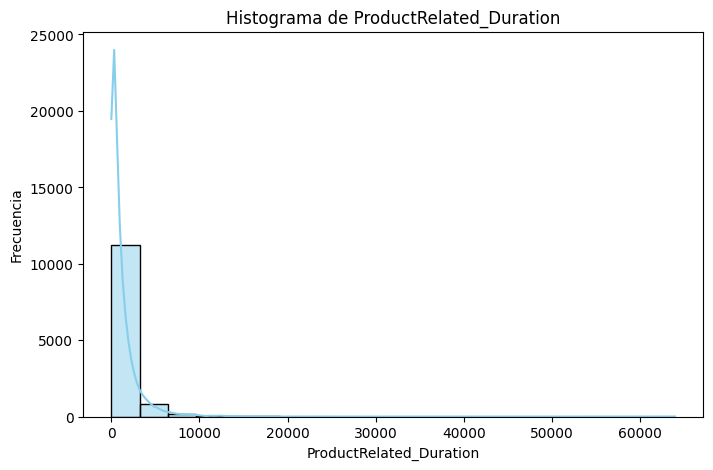

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


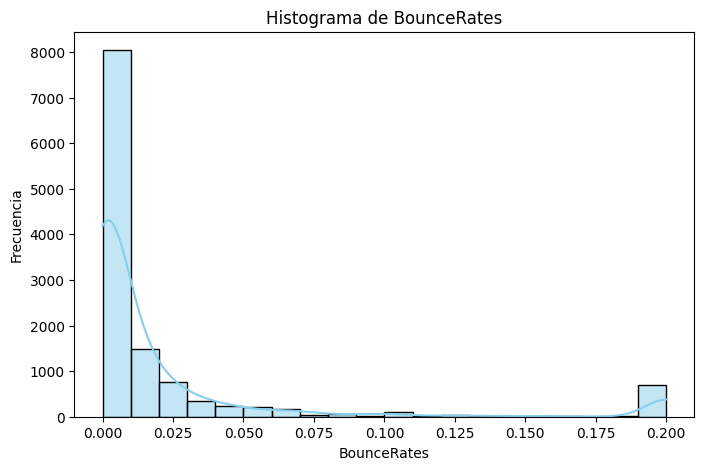

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


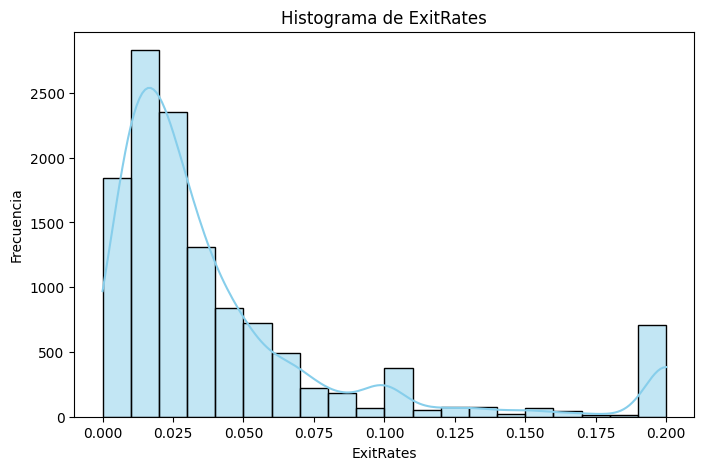

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


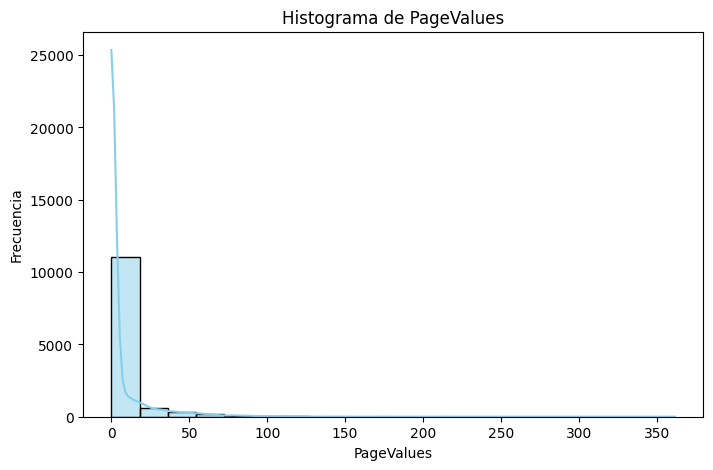

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


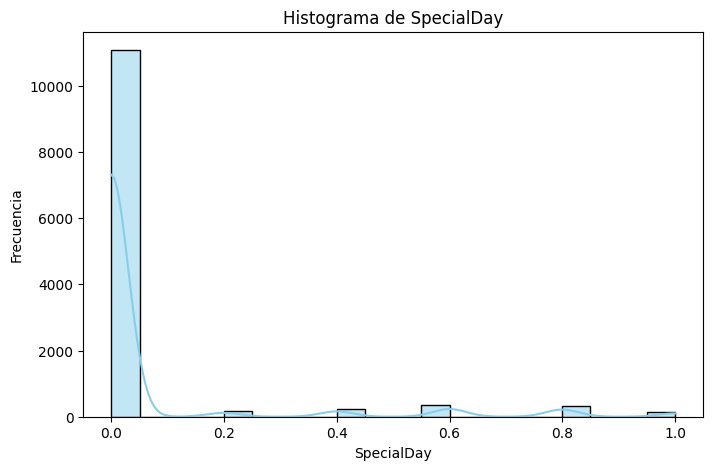

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


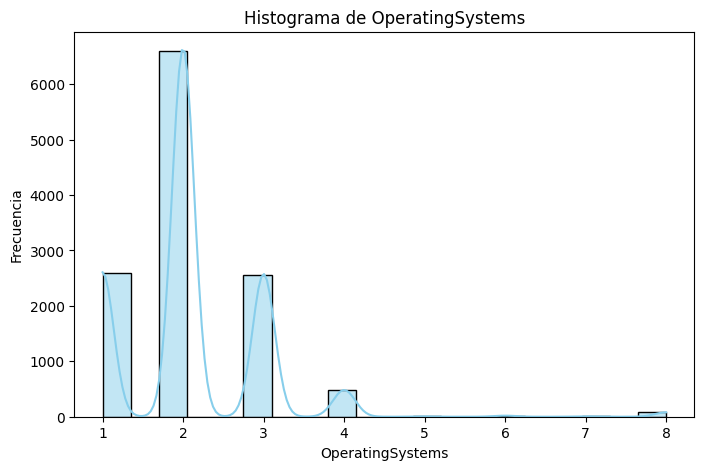

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


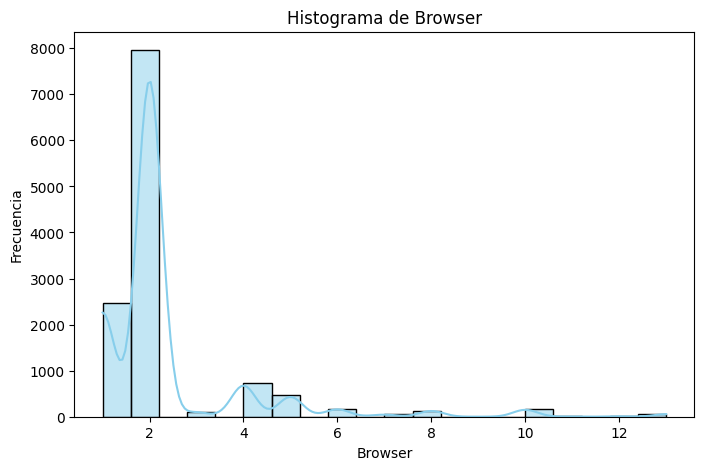

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


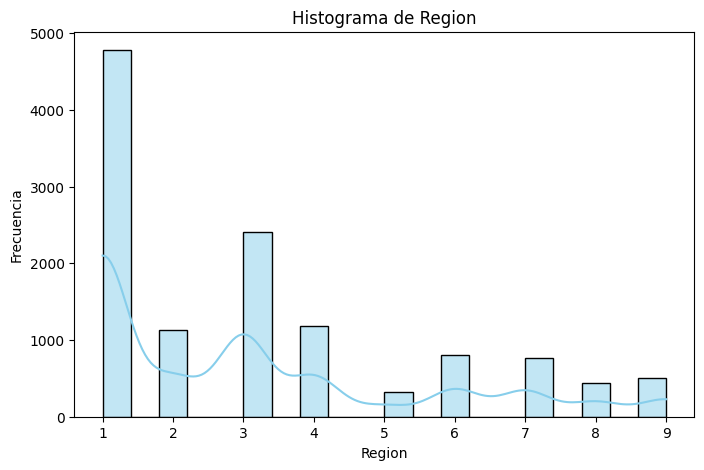

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


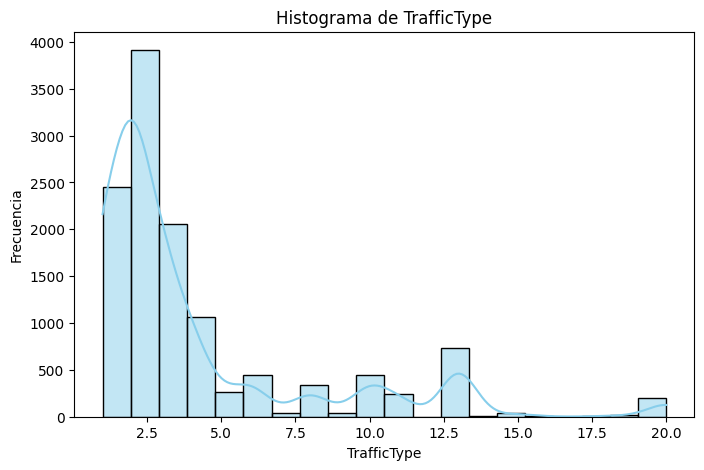

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


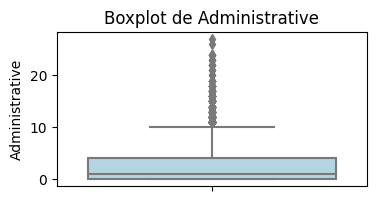

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


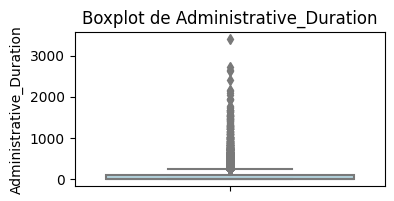

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


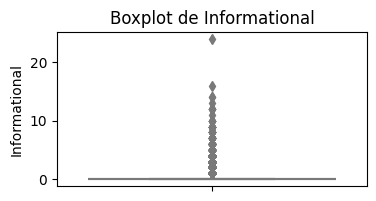

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


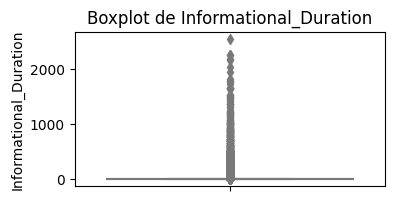

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


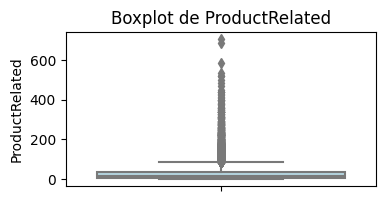

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


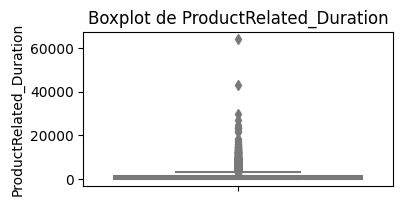

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


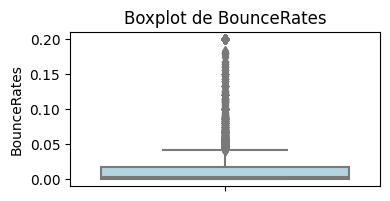

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


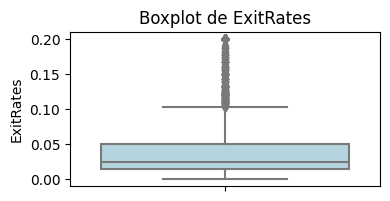

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


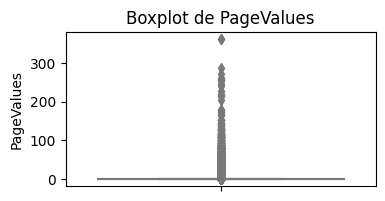

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


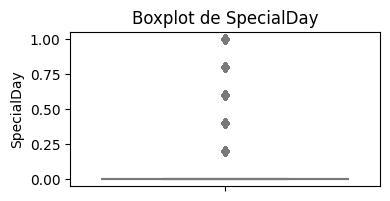

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


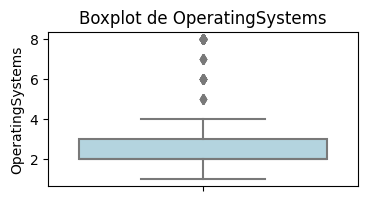

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


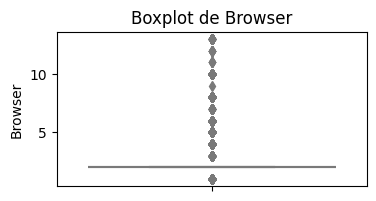

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


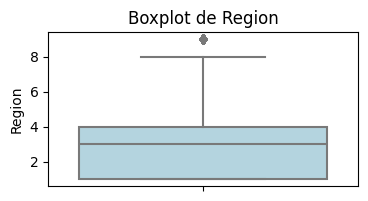

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


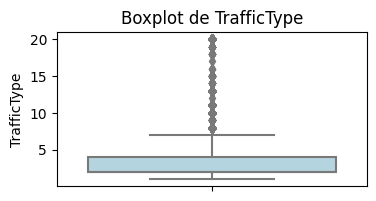

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


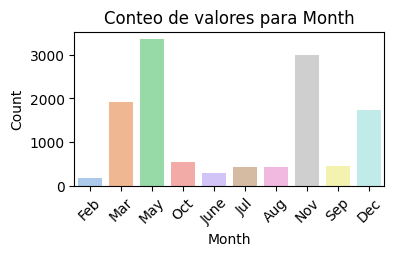

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


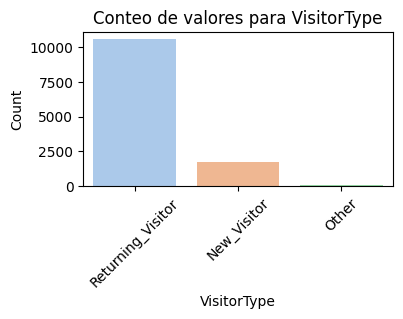

In [12]:
# Visualización de histogramas para variables numéricas
for col in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

# Visualización de boxplots para variables numéricas
for col in numeric_columns:
    plt.figure(figsize=(4, 2))
    sns.boxplot(y=data[col], color='lightblue')
    plt.title(f'Boxplot de {col}')
    plt.ylabel(col)
    plt.show()

# Visualización de gráficos de barras para variables categóricas
for col in categorical_columns:
    plt.figure(figsize=(4, 2))
    sns.countplot(x=col, data=data, palette='pastel')
    plt.title(f'Conteo de valores para {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [13]:
# Identificamos valores faltantes
missing_values = data.isnull().sum()
print("Valores faltantes en el conjunto de datos: ", missing_values)
# Eliminamos los valores faltantes
data_cleaned = data.dropna()


Valores faltantes en el conjunto de datos:  Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64


In [17]:
# Identificamos valores atípicos
def detect_outliers(df, features):
    outlier_indices = []
    for col in features:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = list(set(outlier_indices))
    return outlier_indices
    
outliers = detect_outliers(data_cleaned, numeric_columns)
print("Valores atípicos detectados y eliminados: ", len(outliers))
data_cleaned = data_cleaned.drop(outliers, axis = 0).reset_index(drop = True)


Valores atípicos detectados y eliminados:  9772


In [18]:
# Codificación one-hot (dummies) para 'Month'
data_encoded = pd.get_dummies(data_cleaned, columns = ['Month'], drop_first = True)
"""El método get_dummies (Pandas) se emplea para convertir variables categóricas en numéricas y crear nuevas columnas binarias .Lo utilizamos para aplicar la codificación one-hot a la variable 'Month'
El argumento drop_first = True se utiliza para evitar la multicolinealidad, eliminando la primera columna generada.
"""
# Utilizamos LabelEncoder para la variable 'VisitorType'
label_encoder = LabelEncoder()
data_encoded['VisitorType'] = label_encoder.fit_transform(data_encoded['VisitorType'])
"""LabelEncoder se emplea para codificar etiquetas categóricas en variables numéricas. Se asigna un número entero único a cada etiqueta única en la serie. Por ej: Rojo, Azul y Verde sería igual a 0, 1 y 2.
El código proporcionado, se utiliza LabelEncoder para convertir la variable categórica 'VisitorType' en datos numéricos
"""

"LabelEncoder se emplea para codificar etiquetas categóricas en variables numéricas. Se asigna un número entero único a cada etiqueta única en la serie. Por ej: Rojo, Azul y Verde sería igual a 0, 1 y 2.\nEl código proporcionado, se utiliza LabelEncoder para convertir la variable categórica 'VisitorType' en datos numéricos\n"

In [ ]:
# 'Region' se considera menos relevante para el análisis
data_cleaned = data_cleaned.drop(['Region'], axis=1)
# La variable 'Region' se elimina debido a que el análisis se centra en el comportamiento del cliente y las interacciones en línea, y la ubicación geográfica no se considera un factor relevante en este contexto.


In [ ]:
## Estandarizamos los datos

# Inicializamos el objeto StandardScaler()
scaler = StandardScaler() #Permite estandarizacion de media a 0 y desv estandar a 1
# Aplicamos la estandarización a las columnas numéricas
data_cleaned[numeric_columns] = scaler.fit_transform(data_cleaned[numeric_columns])



In [20]:
# Dividimos los datos en conjuntos de entrenamiento y prueba
x = data_encoded.drop('Revenue', axis = 1) # Features
y = data_encoded['Revenue'] # Target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

# Modelo lineal
logistic_model = LogisticRegression(max_iter = 100000)
logistic_model.fit(x_train, y_train)
y_pred_logistic = logistic_model.predict(x_test)
print("LogisticRegression: ", classification_report(y_test, y_pred_logistic))
print("confusion_matrix: ", confusion_matrix(y_test, y_pred_logistic))

# Modelo de redes neuronales
neural_network_model = MLPClassifier()
neural_network_model.fit(x_train, y_train)
y_pred_neural = neural_network_model.predict(x_test)
print("Neural Network: ", classification_report(y_test, y_pred_neural))
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred_neural))

# Modelo de Random Forest
random_forest_model = RandomForestClassifier()
random_forest_model.fit(x_train, y_train)
y_pred_forest = random_forest_model.predict(x_test)
print("Random Forest Classifier: ", classification_report(y_test, y_pred_forest))
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred_forest))

# Obtenemos informes de clasificación que incluyen precisión, recall, F1-score y support para cada clase en cada modelo

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

LogisticRegression:                precision    recall  f1-score   support

       False       0.97      1.00      0.98       493
        True       0.00      0.00      0.00        16

    accuracy                           0.97       509
   macro avg       0.48      0.50      0.49       509
weighted avg       0.94      0.97      0.95       509

confusion_matrix:  [[493   0]
 [ 16   0]]
Neural Network:                precision    recall  f1-score   support

       False       0.97      1.00      0.99       493
        True       1.00      0.06      0.12        16

    accuracy                           0.97       509
   macro avg       0.99      0.53      0.55       509
weighted avg       0.97      0.97      0.96       509

Confusion Matrix:  [[493   0]
 [ 15   1]]
Random Forest Classifier:                precision    recall  f1-score   support

       False       0.97      1.00      0.99       493
        True       1.00      0.06      0.12        16

    accuracy                     

In [25]:
## Empleamos GridSearchCV (sklearn.model_selection) para la optimización de parámetros en cada método
### Regresión Logística
# Definimos la rejilla de parámetros
param_grid_logistic = {'C':[0.1, 1, 10, 100], 'max_iter': [100, 200, 300]}
# Inicializamos GridSearchCV
grid_logistic = GridSearchCV(logistic_model, param_grid_logistic, cv = 5)
# Ajustamos el modelo con los datos de entrenamiento
grid_logistic.fit(x_train, y_train)
# Imprimimos los mejores parámetros y el mejor resultado
print("Mejores parámetros para Regresión Logística: ", grid_logistic.best_params_)
print("Mejor resultado para Regresión Logística: ", grid_logistic.best_score_)

### Redes neuronales
# Realizamos el mismo proceso(rejilla_parametros, Inicializador, Ajuste, Imprimir)
param_grid_neural = {'hidden_layer_sizes':[(50,), (100,), (50, 50)], 'activation': ['Logistic', 'relu']}
grid_neural = GridSearchCV(neural_network_model, param_grid_neural, cv = 5)
grid_neural.fit(x_train, y_train)
print("Mejores parámetros para Redes Neuronales:", grid_neural.best_params_)
print("Mejor resultado para Redes Neuronales:", grid_neural.best_score_)

### Random Forest
param_grid_forest = {'n_estimators':[100, 200, 300], 'max_depth': [10, 20, 30]}
grid_forest = GridSearchCV(random_forest_model, param_grid_forest, cv = 5)
grid_forest.fit(x_train, y_train)
print("Mejores parámetros para Random Forest:", grid_forest.best_params_)
print("Mejor resultado para Random Forest:", grid_forest.best_score_)



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Mejores parámetros para Regresión Logística:  {'C': 0.1, 'max_iter': 100}
Mejor resultado para Regresión Logística:  0.9656019656019657


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/s

Mejores parámetros para Redes Neuronales: {'activation': 'relu', 'hidden_layer_sizes': (50,)}
Mejor resultado para Redes Neuronales: 0.9660933660933662
Mejores parámetros para Random Forest: {'max_depth': 10, 'n_estimators': 200}
Mejor resultado para Random Forest: 0.9660933660933662


In [27]:
## Para seleccionar el mejor modelo segun metrica ROC en validacion cruzada empleamos la funcion 'cross_val_score'
"""
La Curva ROC y el area bajo la curva (AUC) se emplean para evaluar la capacidad de un modelo de clasificacion para distinguir entre clases
- La Curva ROC representa la tasa de verdaderos positivos (Sensibilidad) en funcion de la tasa de falsos positivos (1 - Especificidad) a medida que se varia el umbral de clasificacion
- AUC es un resumen numerico de la capacidad de discriminacion del modelo, donde un valor 1 = rendimiento perfecto y un valor 0.5 = rendimiento aleatorio

La Validacion Cruzada se emplea para evaluar el rendimiento de un modelo de aprendizaje automatico y para mitigar problemas de sobreajuste y subajuste
Empleamos la validacion cruzada en 5 pliegues (cv = 5)
"""
# Calculamos el área bajo la curva ROC para cada modelo empleando validacion cruzada
logistic_roc_scores = cross_val_score(grid_logistic.best_estimator_, x, y, cv = 5, scoring='roc_auc')
neural_roc_scores = cross_val_score(grid_neural.best_estimator_, x, y, cv = 5, scoring='roc_auc')
forest_roc_scores = cross_val_score(grid_forest.best_estimator_, x, y, cv = 5, scoring = 'roc_auc')
# Seleccionamos el modelo con el mejor ROC
best_model = max([(logistic_roc_scores.mean(), 'Regresion Logistica'),
                  (neural_roc_scores.mean(), 'Redes neuronales'),
                  (forest_roc_scores.mean(), 'Random Forest')], key = lambda x: x[0])
# Imprimimos el mejor modelo
print("Mejor modelo: ", best_model[1])
# Predecimos en el cnjunto de prueba y obtenemos métricas estimadas
if best_model[1] == 'Regresion Logistica':
    y_pred = grid_logistic.best_estimator_.predict(x_test)
elif best_model[1] == 'Redes neuronales':
    y_pred = grid_neural.best_estimator_.predict(x_test)
else:
    y_pred = grid_forest.best_estimator_.predict(x_test)

# Calculamos Metrica ROC en el conjunto de prueba
roc_test = roc_auc_score(y_test, y_pred)
print("Métrica ROC estimada en el conjunto de prueba ", roc_test)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Mejor modelo:  Random Forest
Métrica ROC estimada en el conjunto de prueba  0.5302358012170385


In [32]:
"""
Para la umbralizacion de las probabilidades empleando el umbral que maximie el area bajo ROC:
- Se calculan las probabilidades de clase positiva en TEST para el mejor modelo
- Se emplea 'roc_curve' para obtener falsos y verdaderos positivos y umbrales para predicciones
- Encontramos el umbral que maximiza el indice en ROC = punto mas cercano a la esquina superior izquierda del grafico ROC
- Aplicamos este umbral a las probabilidades originales para clasificar observaciones positivas o negativas segun umbral optimo
"""

# Obtenemos probabilidades de clase positiva para cada observacion en TEST
probs = grid_logistic.best_estimator_.predict_proba(x_test)[:, 1]
# Obtenemos falsos positivos y verdaderos positivos (tasas) y umbrales
fpr, tpr, thresholds = roc_curve(y_test, probs)
# Encontramos el umbral que maximiza el indice en la curva ROC
optimal_idx = np.argmax(tpr-fpr)
optimal_threshold = thresholds[optimal_idx]
# Aplicamos el umbral óptimo a las probabilidades originales
y_pred_thresholded = (probs >= optimal_threshold.astype(int))

# Imprimimos los resultados de la umbralización
print("Umbral óptimo:", optimal_threshold)
print("Resultados después de la umbralización:")
print(classification_report(y_test, y_pred_thresholded))
print("Matriz de confusión después de la umbralización:")
print(confusion_matrix(y_test, y_pred_thresholded))
# Calculamos la métrica ROC después de la umbralización
roc_thresholded = roc_auc_score(y_test, y_pred_thresholded)
print("Métrica ROC después de la umbralización:", roc_thresholded)

Umbral óptimo: 0.042577926068225094
Resultados después de la umbralización:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       493
        True       0.03      1.00      0.06        16

    accuracy                           0.03       509
   macro avg       0.02      0.50      0.03       509
weighted avg       0.00      0.03      0.00       509

Matriz de confusión después de la umbralización:
[[  0 493]
 [  0  16]]
Métrica ROC después de la umbralización: 0.5


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.